# Python Trading Toolbox: Weighted and Exponential Moving Averages

In the first article of the Financial Trading Toolbox series ([Building a Financial Trading Toolbox in Python: Simple Moving Average][1]), we discussed how to calculate a simple moving average, add it to a price series chart, and use it for investment and trading decisions.
The Simple Moving Average is only one of several moving averages available that can be applied to price series to build trading systems or investment decision frameworks. Among those, two other moving averages are commonly used among financial market analysts:

- Weighted Moving Average (__WMA__)
- Exponential Moving Average (__EMA__)

In this article, we will explore how to calculate those two averages and how to ensure that the results match the definitions that we need to implement.

[1]: https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388

### Weighted Moving Average

In some applications, one of the limitations of the simple moving average is that it gives equal weight to each of the daily prices included in the window. E.g., in a 10-day moving average, the most recent day receives the same weight as the first day in the window: each price receives a 10% weighting.

Compared to the Simple Moving Average, the _Linearly Weighted Moving Average_ (or simply _Weighted Moving Average,_ __WMA__), gives more weight to the most recent price and gradually less as we look back in time. On a 10-day weighted average, the price of the 10th day would be multiplied by 10, that of the 9th day by 9, the 8th day by 8 and so on. The total will then be divided by the sum of the weights (in this case: 55). In this specific example, the most recent price receives about 18.2% of the total weight, the second more recent 16.4%, and so on until the oldest price in the window that receives 0.02% of the weight.

Let's put that in practice with an example in Python.
In addition to *pandas* and Matplotlib, we are going to make use of NumPy:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

print('Python version: ' + sys.version)
print('pandas version: ' + pd.__version__)
print('NumPy version:' + np.__version__)
print('matplotlib version: ' + mpl.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
NumPy version:1.16.4
matplotlib version: 3.1.1


In [2]:
%matplotlib inline

plt.style.use('fivethirtyeight')

For the next examples, we are going to use price data from a [StockCharts.com article][1]. It's an excellent educational article on moving averages and I recommend reading it. The price series used in that article could belong to any stock or financial instrument and will serve our purposes for illustration.

I modified the [original Excel sheet][3] by including calculations for the 10-day WMA since the calculation for the EMA is already included. You can access my [Google Sheets file][2] and download the data in  CSV format [here][4].

It is always a good practice, when modeling data, to start with a simple implementation of our model that we can use to make sure that the results from our final implementation are correct. 

[1]: https://school.stockcharts.com/doku.php?id=technical_indicators:moving_averages
[2]: https://drive.google.com/open?id=1LztjXRI0O2YP7Dezcczqz7TdFfXDrCsduYV9kVv0Qck
[3]: https://school.stockcharts.com/lib/exe/fetch.php?media=technical_indicators:moving_averages:cs-movavg.xls
[4]: https://raw.githubusercontent.com/stebas101/TradingToolbox/master/data/cs-movavg.csv

We start by loading the data into a data frame:

In [3]:
datafile = 'data/cs-movavg.csv'

data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index)
# We can drop the old index column:
data = data.drop(columns='Unnamed: 0')

data

,Price,10-day SMA,10-day WMA,Smoothing Constant 2/(10 + 1),10-day EMA
Date,,,,,
2010-03-24,22.273,NaN,NaN,NaN,NaN
2010-03-25,22.194,NaN,NaN,NaN,NaN
2010-03-26,22.085,NaN,NaN,NaN,NaN
2010-03-29,22.174,NaN,NaN,NaN,NaN
2010-03-30,22.184,NaN,NaN,NaN,NaN
2010-03-31,22.134,NaN,NaN,NaN,NaN
2010-04-01,22.234,NaN,NaN,NaN,NaN
2010-04-05,22.432,NaN,NaN,NaN,NaN
2010-04-06,22.244,NaN,NaN,NaN,NaN


We are going to consider only the Price and 10-Day WMA columns for now and move to the EMA later on.

When it comes to linearly weighted moving averages, the *pandas* library does not have a ready off-the-shelf method to calculate them. It offers, however, a very powerful and flexible method: `.apply()`
This method allows us to create and pass any [custom function][1] to a rolling window: that is how we are going to calculate our Weighted Moving Average.
In order to calculate a **10-Day WMA**, we start by creating an array of weights - whole numbers from 1 to 10:

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.Rolling.apply.html

In [4]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included

weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Next, using the `.apply()` method we pass our own function (a [*lambda* function][1]) to compute the [*dot product*][2] of weights and prices in our rolling window (prices in the window will be multiplied by the corresponding weight, then summed), then dividing it by the sum of the weights:

[1]: https://www.w3schools.com/python/python_lambda.asp
[2]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

In [5]:
wma10 = data['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

wma10.head(20)

Date
2010-03-24          NaN
2010-03-25          NaN
2010-03-26          NaN
2010-03-29          NaN
2010-03-30          NaN
2010-03-31          NaN
2010-04-01          NaN
2010-04-05          NaN
2010-04-06          NaN
2010-04-07    22.246473
2010-04-08    22.233618
2010-04-09    22.266382
2010-04-12    22.293527
2010-04-13    22.356909
2010-04-14    22.547800
2010-04-15    22.843927
2010-04-16    23.050818
2010-04-19    23.244455
2010-04-20    23.434455
2010-04-21    23.535582
Name: Price, dtype: float64

Now, we want to compare our WMA to the one obtained with the spreadsheet. To do so, we can add an *'Our 10-day WMA'* column to the dataframe. To make the visual comparison easier, we can round the WMA series to three decimals using the `.round()` method from NumPy. Then, we select the price and WMA columns to be displayed:

In [6]:
data['Our 10-day WMA'] = np.round(wma10, decimals=3)

data[['Price', '10-day WMA', 'Our 10-day WMA']].head(20)

,Price,10-day WMA,Our 10-day WMA
Date,,,
2010-03-24,22.273,NaN,NaN
2010-03-25,22.194,NaN,NaN
2010-03-26,22.085,NaN,NaN
2010-03-29,22.174,NaN,NaN
2010-03-30,22.184,NaN,NaN
2010-03-31,22.134,NaN,NaN
2010-04-01,22.234,NaN,NaN
2010-04-05,22.432,NaN,NaN
2010-04-06,22.244,NaN,NaN


The two WMA columns look the same. There are a few differences in the third decimal place, but we can put that down to rounding error and conclude that our implementation of the WMA is correct. In a real-life application, if we want to be more rigorous we should compute the differences between the two columns and check that they are not too large. For now, we keep things simple and we can be satisfied with the visual inspection.

It would be interesting to compare in a plot our newly created **WMA** with the familiar **SMA**:

/Users/stebas/anaconda3/envs/ta/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


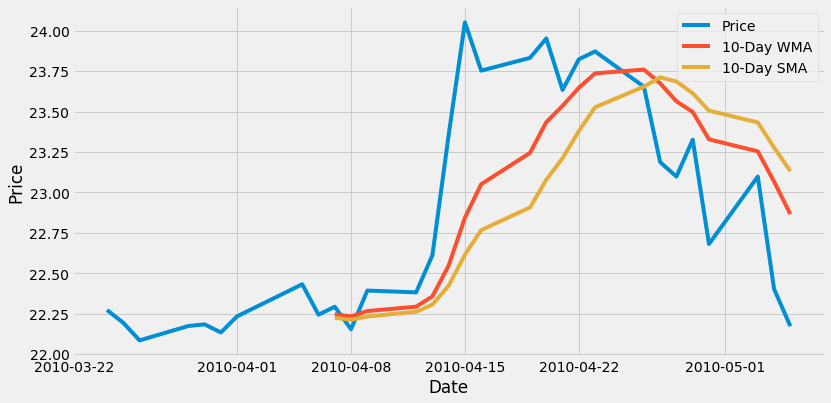

In [7]:
sma10 = data['Price'].rolling(10).mean()

plt.figure(figsize = (12,6))

plt.plot(data['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

As we can see, both averages smooth out the price movement. The WMA is more reactive and follows the price closer than the SMA: we expect that since the WMA gives more weight to the most recent price observations. Also, both moving average series start on day 10: the first day with enough available data to compute the averages.

The Weighted Moving Average may be lesser known than its Exponential sibling. However, it can be an additional item in our toolbox when we try to build original solutions. Implementing the WMA in Python forced us to search for a way to create customized moving averages using `.apply()`: this technique can be used to implement new and original moving averages as well.

### Exponential Moving Average

Similarly to the Weighted Moving Average, the Exponential Moving Average (**EMA**) assigns a greater weight to the most recent price observations. While it assigns lesser weight to past data, it is based on a recursive formula that includes in its calculation all the past data in our price series.

The EMA at time $t$ is calculated as the current price multiplied by a smoothing factor _alpha_ (a positive number less than 1) plus the EMA at time $t-1$ multiplied by 1 minus the _alpha_. It is basically a value between the previous EMA and the current price:

$$EMA_t = \alpha Price_t + (1 - \alpha) EMA_{t-1} $$

The smoothing factor $\alpha$ ( _alpha_ ) is defined as:

$$ \alpha = \frac{2}{(n + 1)} $$

where $n$ is the number of days in our span. Therefore, a **10-day EMA** will have a smoothing factor:

$$ \alpha = \frac{2}{10 + 1} \approx 0.1818$$

Pandas includes a method to compute the EMA moving average of any time series: [`.ewm()`][1] Will this method respond to our needs and compute an average that matches our definition? Let's test it:

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [8]:
ema10 = data['Price'].ewm(span=10).mean()

ema10.head(10)

Date
2010-03-24    22.273000
2010-03-25    22.229550
2010-03-26    22.171442
2010-03-29    22.172285
2010-03-30    22.175648
2010-03-31    22.164830
2010-04-01    22.181498
2010-04-05    22.238488
2010-04-06    22.239687
2010-04-07    22.250886
Name: Price, dtype: float64

We want to compare this EMA series with the one obtained in the spreadsheet:

In [9]:
data['Our 10-day EMA'] = np.round(ema10, decimals=3)

data[['Price', '10-day EMA', 'Our 10-day EMA']].head(20) 

,Price,10-day EMA,Our 10-day EMA
Date,,,
2010-03-24,22.273,NaN,22.273
2010-03-25,22.194,NaN,22.230
2010-03-26,22.085,NaN,22.171
2010-03-29,22.174,NaN,22.172
2010-03-30,22.184,NaN,22.176
2010-03-31,22.134,NaN,22.165
2010-04-01,22.234,NaN,22.181
2010-04-05,22.432,NaN,22.238
2010-04-06,22.244,NaN,22.240


As you have already noticed, we have a problem here: the 10-day EMA that we just calculated does not correspond to the one calculated in the downloaded spreadsheet. One starts on day 10, while the other starts on day 1. Also, the values do not match exactly.

Is our calculation wrong? Or is the calculation in the provided spreadsheet wrong? Neither: those two series correspond to two different definitions of EMA. To be more specific, the formula used to compute the EMA is the same. What changes is the use of the initial values.

If we look carefully at the definition of Exponential Moving Average on the StockCharts.com [web page][1] we can notice one important detail: they start calculating a 10-day moving average on day 10, disregarding the previous days and replacing the price on day 10 with its **10-day SMA**. It's a different definition than the one applied when we calculated the EMA using the `.ewm()` method directly.

[1]: https://school.stockcharts.com/doku.php?id=technical_indicators:moving_averages

The following lines of code create a new modified price series where the first 9 prices (when the SMA is not available) are replaced by *NaN* and the price on the 10th date becomes its 10-Day SMA:

In [10]:
modPrice = data['Price'].copy()
modPrice.iloc[0:10] = sma10[0:10]
modPrice.head(20)

Date
2010-03-24        NaN
2010-03-25        NaN
2010-03-26        NaN
2010-03-29        NaN
2010-03-30        NaN
2010-03-31        NaN
2010-04-01        NaN
2010-04-05        NaN
2010-04-06        NaN
2010-04-07    22.2247
2010-04-08    22.1540
2010-04-09    22.3930
2010-04-12    22.3820
2010-04-13    22.6110
2010-04-14    23.3560
2010-04-15    24.0520
2010-04-16    23.7530
2010-04-19    23.8320
2010-04-20    23.9520
2010-04-21    23.6340
Name: Price, dtype: float64

We can use this modified price series to calculate a second version of the EWM. By looking at the [documentation][1], we can note that the `.ewm()` method has an **adjust** parameter that defaults to *True*. This parameter adjusts the weights to account for the imbalance in the beginning periods (if you need more detail, see the *Exponentially weighted windows* section in the [*pandas* documentation][2]).

If we want to emulate the EMA as in our spreadsheet using our modified price series, we don't need this adjustment. We then set `adjust=False`:

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
[2]: https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows

In [11]:
ema10alt = modPrice.ewm(span=10, adjust=False).mean()

Will this newly calculated EMA match the one calculated in the spreadsheet? Let's have a look:

In [12]:
data['Our 2nd 10-Day EMA'] = np.round(ema10alt, decimals=3)

data[['Price', '10-day EMA', 'Our 10-day EMA', 'Our 2nd 10-Day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA,Our 2nd 10-Day EMA
Date,,,,
2010-03-24,22.273,NaN,22.273,NaN
2010-03-25,22.194,NaN,22.230,NaN
2010-03-26,22.085,NaN,22.171,NaN
2010-03-29,22.174,NaN,22.172,NaN
2010-03-30,22.184,NaN,22.176,NaN
2010-03-31,22.134,NaN,22.165,NaN
2010-04-01,22.234,NaN,22.181,NaN
2010-04-05,22.432,NaN,22.238,NaN
2010-04-06,22.244,NaN,22.240,NaN


Now, we are doing much better. We have obtained an EMA series that matches the one calculated in the spreadsheet.

We ended up with two different versions of EMA in our hands:

1. `ema10`: This version uses the plain `.ewm()` method, starts at the beginning of our price history but does not match the definition used in the spreadsheet.

2. `ema10alt`: This version starts on day 10 (with an initialvalue equal to the 10-day SMA) and matches the definition on our spreadsheet.

Which one is the best to use? The answer is: it depends on what we need for our application and to build our system. If we need an EMA series that starts from day 1, then we should choose the first one.
On the other hand, if we need to use our average in combination with other averages that have no values for the initial days (such as the SMA), then the second is probably the best one.

The second EMA is widely used among financial market analysts: if we need to implement an already existing system, we need to be careful to use the correct definition. Otherwise, the results may not be what is expected from us and may put the accuracy of all of our work into question. In any case, the numeric difference between those two averages is very minimal, with an impact on our trading or investment decision system limited to the initial days.

Let's look at all the moving averages we have used so far in a chart:

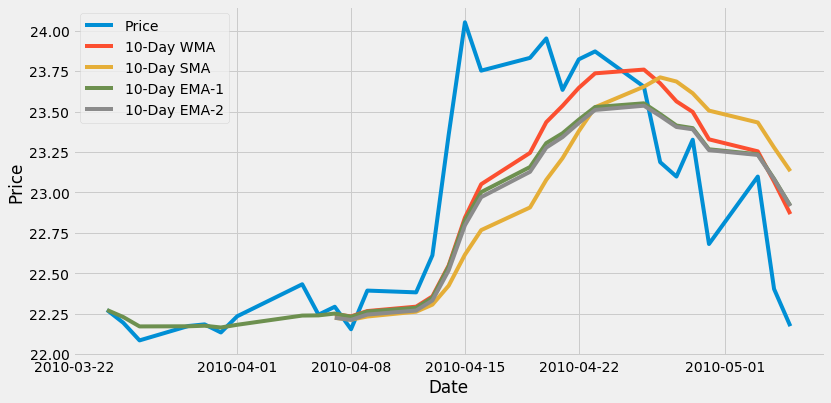

In [15]:
plt.figure(figsize = (12,6))

plt.plot(data['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.plot(ema10, label="10-Day EMA-1")
plt.plot(ema10alt, label="10-Day EMA-2")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

Of all the moving averages, the **WMA** appears the one that is more responsive and tags the price more closely, while the **SMA** is the one that responds with some more lag. The two versions of the **EMA** tend to overlap each other, mainly in the last days.

I hope you found this post useful. Introducing the Weighted Moving Average helped us to learn and implement a custom average based on a specific definition. Working with the Exponential Moving Average gave us the chance to highlight how important it is to ensure that any function we are using to work on price series matches the definition that we have for any given task.